Background:

ACME is one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

At ACME we thrive for making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

Download Data:

https://drive.google.com/open?id=1KWE3J0uU_sFIJnZ74Id3FDBcejELI7FD

Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

Try to submit your working solution as soon as possible. The sooner the better.

Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

Submission Instructions:
Project should be implemented with Python
Please name your repository on GitHub with this name without exposing your project information: zmXPJXRi9E3MbXz9
Please update your phone number from here to submit your project!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import math
import warnings
from scipy import stats
from itertools import combinations
from scipy.stats import chi2_contingency
from sklearn import linear_model
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, confusion_matrix, plot_confusion_matrix, mean_squared_error, r2_score, matthews_corrcoef, confusion_matrix, accuracy_score, classification_report, fbeta_score, make_scorer
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.over_sampling import  RandomOverSampler, SMOTE
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification


pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#reading the file 

data = pd.read_csv('ACME-HappinessSurvey2020.csv')
data.head(5)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


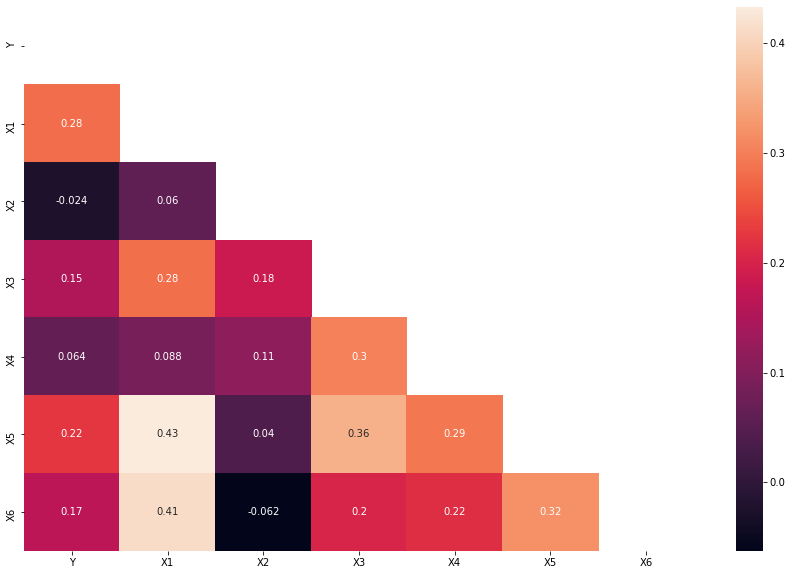

In [3]:
#checking correlation matrix

correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

## What have we learned on features on the correlation matrix?

#### Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

About Y we learned that the higher correlation in terms of feature importance is X1, the lowest correlation is with X2.




#### X1 = my order was delivered on time (highest correlation)
#### X2 = contents of my order was as I expected (lowest correlation)

#### X3 = I ordered everything I wanted to order
#### X4 = I paid a good price for my order
#### X5 = I am satisfied with my courier (second highest correlation)
#### X6 = the app makes ordering easy for me (third highest correlation)

What emerges from the features subject of the research is that customer's happyness yes/no is highly dependent on the delivery: time, service, the app.


Depending on the business, they could be also correlated, for example among those features we can see that X1,X5,X6 are also highly correlated among each other compare to the rest. 


BUSINESS QUESTION AFTER DATA:
Is because with the app you can track the delivery time or rate the courier service? Is because of less clicks to get to the delivery goal? And what are the steps in between?

We need more Data to clarify those aspects.



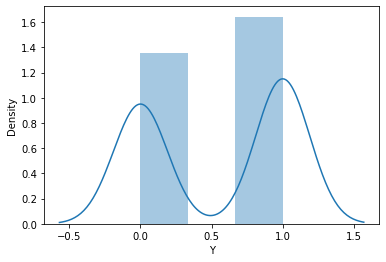

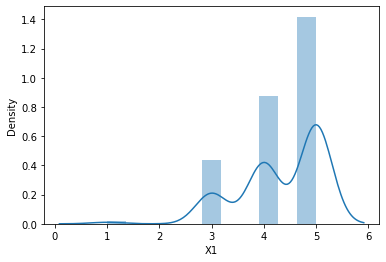

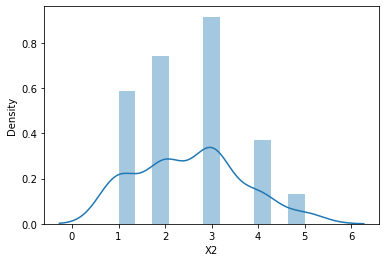

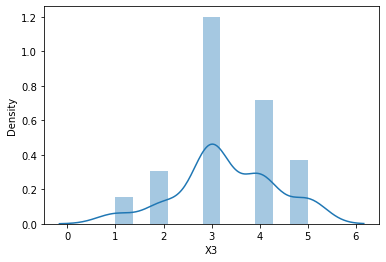

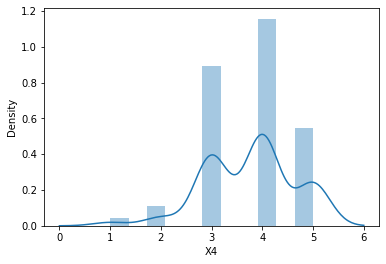

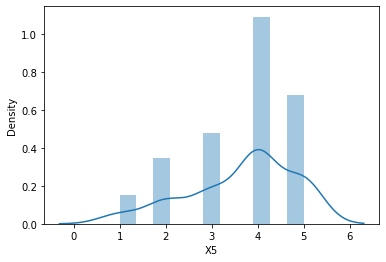

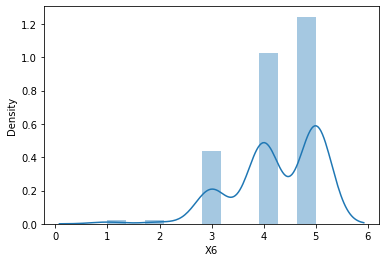

In [4]:
for column in data.columns:
    plt.figure()             
    sns.distplot(data[column])

In [5]:
y = data['Y']
x = data.drop(['Y'], axis = 1)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)


In [7]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(x_train, y_train)

In [8]:
predictions = classification.predict(x_test)
classification.score(x_test, y_test)


0.6470588235294118

In [9]:
print("Accuracy of the model in TEST set is: ", round(classification.score(x_test, y_test),2))


Accuracy of the model in TEST set is:  0.65


In [10]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, predictions)


array([[11, 10],
       [ 8, 22]], dtype=int64)

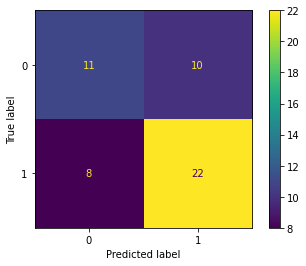

In [11]:
plot_confusion_matrix(classification, x_test, y_test)


In [12]:
def classification_model(X,y,tomek,balancer,scaler,neighbors):
    
    tl = TomekLinks('majority')
    rus = RandomUnderSampler()
    Ros = RandomOverSampler()
    smote = SMOTE()
    ftwo_scorer = make_scorer(cohen_kappa_score)

#Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#Scaler
    if scaler=="StandardScaler":
        scaler_x = StandardScaler().fit(X_train)
        X_train_scaled = pd.DataFrame(scaler_x.transform(X_train),columns=X.columns)
        X_test_scaled = pd.DataFrame(scaler_x.transform(X_test),columns=X.columns)
    elif scaler=="MinMax":
        scaler_x = MinMaxScaler().fit(X_train)
        X_train_scaled = pd.DataFrame(scaler_x.transform(X_train),columns=X.columns)
        X_test_scaled = pd.DataFrame(scaler_x.transform(X_test),columns=X.columns)
    elif scaler=="Normalizer":
        scaler_x = Normalizer().fit(X_train)
        X_train_scaled = pd.DataFrame(scaler_x.transform(X_train),columns=X.columns)
        X_test_scaled = pd.DataFrame(scaler_x.transform(X_test),columns=X.columns)
    elif scaler=="power":
        pt = PowerTransformer()
        powertrain=pt.fit(X_train)
        powertrainl=(pt.lambdas_)
        powertrain=pt.transform(X_train)
        X_train_scaled=pd.DataFrame(powertrain,columns=X_train.columns)
        powertest=pt.transform(X_test)
        X_test_scaled=pd.DataFrame(powertest,columns=X_test.columns)
    elif scaler=="None":
        X_train_scaled=X_train
        X_test_scaled=X_test

#sample balance
    if tomek=="tomek applied":
        X_train_scaled_tom, y_train_scaled_tom=tl.fit_sample(X_train_scaled, y_train)
    elif tomek=="tomek not applied":
        X_train_scaled_tom,y_train_scaled_tom=X_train_scaled,y_train
    if balancer=="smote sample":
        X_train_scaled_bal, y_train_scaled_bal = smote.fit_sample(X_train_scaled_tom, y_train_scaled_tom)
    elif balancer=="over sample":
        X_train_scaled_bal, y_train_scaled_bal = Ros.fit_sample(X_train_scaled_tom, y_train_scaled_tom)
    elif balancer=="under sample":
        X_train_scaled_bal, y_train_scaled_bal = rus.fit_sample(X_train_scaled_tom, y_train_scaled_tom)
    elif balancer=="unbalanced":
        X_train_scaled_bal,y_train_scaled_bal=X_train_scaled_tom,y_train_scaled_tom

#models
    #Class
    log_ = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', class_weight = {0, 1}, C= 0.1)
    log_classification = log_.fit(X_train_scaled_bal, y_train_scaled_bal)
    log_predictions = log_classification.predict(X_test_scaled)

    #KNN
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn_classification = knn.fit(X_train_scaled_bal, y_train_scaled_bal)
    knn_predictions = knn.predict(X_test_scaled)

    #Forest
    clf = RandomForestClassifier(n_estimators=75,min_samples_split= 2)
    clf_classification = clf.fit(X_train_scaled_bal, y_train_scaled_bal)
    clf_predictions = clf.predict(X_test_scaled)
    #AdaBoost
    ada_clf = AdaBoostClassifier()
    ada_clf_classification = ada_clf.fit(X_train_scaled_bal, y_train_scaled_bal)
    ada_clf_predictions = ada_clf.predict(X_test_scaled)

    #SVC
    svc_clf = svm.SVC()
    svc_clf_classification = svc_clf.fit(X_train_scaled_bal, y_train_scaled_bal)
    svc_clf_predictions = svc_clf.predict(X_test_scaled)

#printing results
    print("| Logistic Regression Model Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, log_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, log_predictions)))
    print(cohen_kappa_score)
    print(confusion_matrix(y_test, log_predictions))
    plot_confusion_matrix(log_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, log_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, log_predictions))    
    print(" =================================================================== ")
    
    print("| KNN Model Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler,", KNN N", neighbors)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, knn_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, knn_predictions)))
    print(confusion_matrix(y_test, knn_predictions))
    plot_confusion_matrix(knn_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, knn_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, knn_predictions))
    print(" =================================================================== ")
    
    print("| Random Forest Classifier Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, clf_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, clf_predictions)))
    print(confusion_matrix(y_test, clf_predictions))
    plot_confusion_matrix(clf_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, clf_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, clf_predictions))
    print(" =================================================================== ")
    
    print("| AdaBoostClassifier Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, ada_clf_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, ada_clf_predictions)))
    print(confusion_matrix(y_test, ada_clf_predictions))
    plot_confusion_matrix(ada_clf_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, ada_clf_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, ada_clf_predictions))
    print(" =================================================================== ")
    
    print("| Support Vector Machines Results")
    print("With:: - Sample balancing: ", tomek,",", balancer,", - Scaler: ", scaler)
    print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, svc_clf_predictions))
    print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, svc_clf_predictions)))
    print(confusion_matrix(y_test, svc_clf_predictions))
    plot_confusion_matrix(svc_clf_classification, X_test_scaled, y_test)
    plt.show()
    print("------ Classification_Report------ ")
    print(classification_report(y_test, svc_clf_predictions))
    print("matthews_corrcoef: ", matthews_corrcoef(y_test, svc_clf_predictions))
    return X_train_scaled_bal, y_train_scaled_bal

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.66 
The Kappa of your model is: 0.32
<function cohen_kappa_score at 0x00000130CDBF71F0>
[[10  4]
 [ 9 15]]


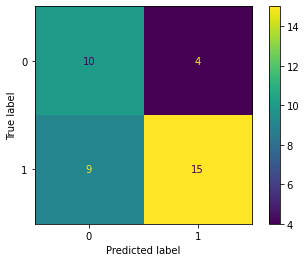

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.53      0.71      0.61        14
           1       0.79      0.62      0.70        24

    accuracy                           0.66        38
   macro avg       0.66      0.67      0.65        38
weighted avg       0.69      0.66      0.66        38

matthews_corrcoef:  0.3273268353539886
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler , KNN N 2
The accuracy of the model on test set is: 0.58 
The Kappa of your model is: 0.21
[[11  3]
 [13 11]]


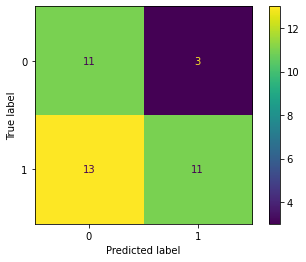

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.46      0.79      0.58        14
           1       0.79      0.46      0.58        24

    accuracy                           0.58        38
   macro avg       0.62      0.62      0.58        38
weighted avg       0.67      0.58      0.58        38

matthews_corrcoef:  0.24404761904761904
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.61 
The Kappa of your model is: 0.21
[[ 9  5]
 [10 14]]


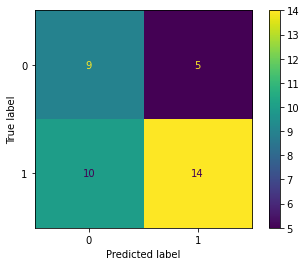

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.47      0.64      0.55        14
           1       0.74      0.58      0.65        24

    accuracy                           0.61        38
   macro avg       0.61      0.61      0.60        38
weighted avg       0.64      0.61      0.61        38

matthews_corrcoef:  0.2182178902359924
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.45 
The Kappa of your model is: -0.11
[[ 6  8]
 [13 11]]


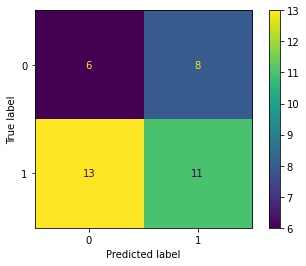

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.32      0.43      0.36        14
           1       0.58      0.46      0.51        24

    accuracy                           0.45        38
   macro avg       0.45      0.44      0.44        38
weighted avg       0.48      0.45      0.46        38

matthews_corrcoef:  -0.1091089451179962
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.63 
The Kappa of your model is: 0.33
[[13  1]
 [13 11]]


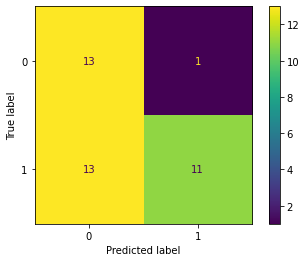

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.50      0.93      0.65        14
           1       0.92      0.46      0.61        24

    accuracy                           0.63        38
   macro avg       0.71      0.69      0.63        38
weighted avg       0.76      0.63      0.63        38

matthews_corrcoef:  0.4015100465247632


In [13]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(x,y,"tomek applied","smote sample","StandardScaler",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.66 
The Kappa of your model is: 0.33
<function cohen_kappa_score at 0x00000130CDBF71F0>
[[11  3]
 [10 14]]


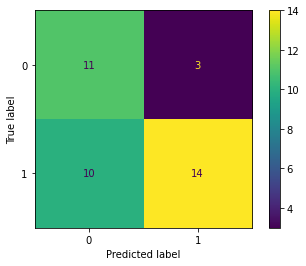

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.52      0.79      0.63        14
           1       0.82      0.58      0.68        24

    accuracy                           0.66        38
   macro avg       0.67      0.68      0.66        38
weighted avg       0.71      0.66      0.66        38

matthews_corrcoef:  0.35802877981553916
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power , KNN N 2
The accuracy of the model on test set is: 0.53 
The Kappa of your model is: 0.16
[[12  2]
 [16  8]]


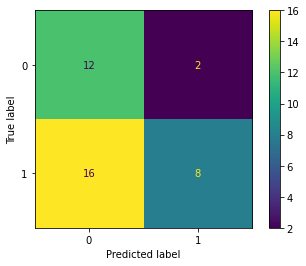

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.43      0.86      0.57        14
           1       0.80      0.33      0.47        24

    accuracy                           0.53        38
   macro avg       0.61      0.60      0.52        38
weighted avg       0.66      0.53      0.51        38

matthews_corrcoef:  0.20865621238292043
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.61 
The Kappa of your model is: 0.27
[[12  2]
 [13 11]]


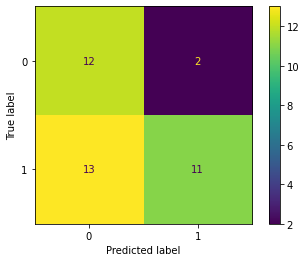

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.48      0.86      0.62        14
           1       0.85      0.46      0.59        24

    accuracy                           0.61        38
   macro avg       0.66      0.66      0.60        38
weighted avg       0.71      0.61      0.60        38

matthews_corrcoef:  0.3207705923144653
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.53 
The Kappa of your model is: 0.14
[[11  3]
 [15  9]]


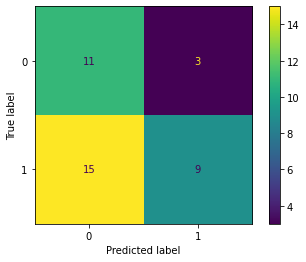

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.42      0.79      0.55        14
           1       0.75      0.38      0.50        24

    accuracy                           0.53        38
   macro avg       0.59      0.58      0.53        38
weighted avg       0.63      0.53      0.52        38

matthews_corrcoef:  0.1667810962487478
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.66 
The Kappa of your model is: 0.37
[[13  1]
 [12 12]]


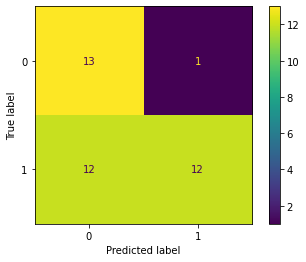

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.52      0.93      0.67        14
           1       0.92      0.50      0.65        24

    accuracy                           0.66        38
   macro avg       0.72      0.71      0.66        38
weighted avg       0.77      0.66      0.66        38

matthews_corrcoef:  0.43576382352153775


In [14]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(x,y,"tomek applied","smote sample","power",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None
The accuracy of the model on test set is: 0.66 
The Kappa of your model is: 0.33
<function cohen_kappa_score at 0x00000130CDBF71F0>
[[11  3]
 [10 14]]


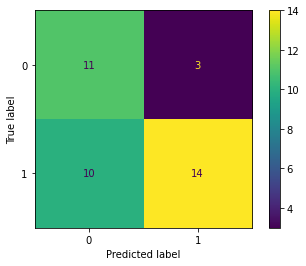

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.52      0.79      0.63        14
           1       0.82      0.58      0.68        24

    accuracy                           0.66        38
   macro avg       0.67      0.68      0.66        38
weighted avg       0.71      0.66      0.66        38

matthews_corrcoef:  0.35802877981553916
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None , KNN N 2
The accuracy of the model on test set is: 0.61 
The Kappa of your model is: 0.29
[[13  1]
 [14 10]]


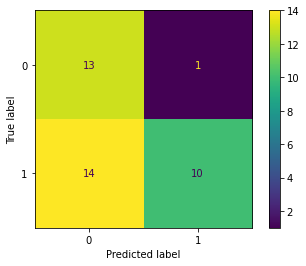

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.48      0.93      0.63        14
           1       0.91      0.42      0.57        24

    accuracy                           0.61        38
   macro avg       0.70      0.67      0.60        38
weighted avg       0.75      0.61      0.59        38

matthews_corrcoef:  0.3672063019255001
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None
The accuracy of the model on test set is: 0.63 
The Kappa of your model is: 0.25
[[ 9  5]
 [ 9 15]]


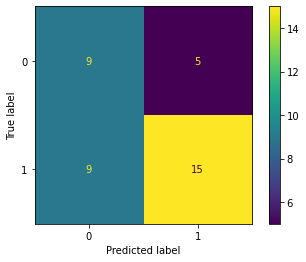

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        14
           1       0.75      0.62      0.68        24

    accuracy                           0.63        38
   macro avg       0.62      0.63      0.62        38
weighted avg       0.66      0.63      0.64        38

matthews_corrcoef:  0.25877458475338283
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None
The accuracy of the model on test set is: 0.58 
The Kappa of your model is: 0.21
[[11  3]
 [13 11]]


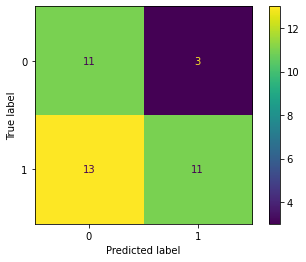

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.46      0.79      0.58        14
           1       0.79      0.46      0.58        24

    accuracy                           0.58        38
   macro avg       0.62      0.62      0.58        38
weighted avg       0.67      0.58      0.58        38

matthews_corrcoef:  0.24404761904761904
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  None
The accuracy of the model on test set is: 0.66 
The Kappa of your model is: 0.33
[[11  3]
 [10 14]]


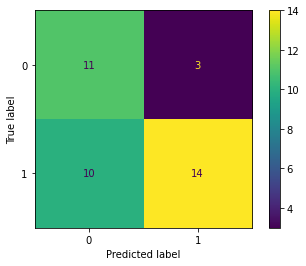

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.52      0.79      0.63        14
           1       0.82      0.58      0.68        24

    accuracy                           0.66        38
   macro avg       0.67      0.68      0.66        38
weighted avg       0.71      0.66      0.66        38

matthews_corrcoef:  0.35802877981553916


In [15]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(x,y,"tomek applied","smote sample","None",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.68 
The Kappa of your model is: 0.38
<function cohen_kappa_score at 0x00000130CDBF71F0>
[[11  3]
 [ 9 15]]


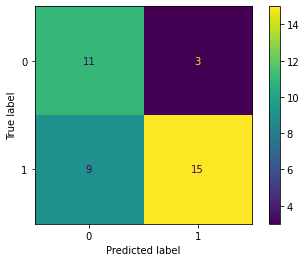

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.55      0.79      0.65        14
           1       0.83      0.62      0.71        24

    accuracy                           0.68        38
   macro avg       0.69      0.71      0.68        38
weighted avg       0.73      0.68      0.69        38

matthews_corrcoef:  0.3967876966218537
| KNN Model Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler , KNN N 2
The accuracy of the model on test set is: 0.55 
The Kappa of your model is: 0.17
[[11  3]
 [14 10]]


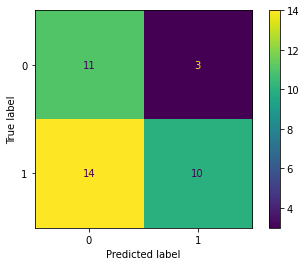

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.44      0.79      0.56        14
           1       0.77      0.42      0.54        24

    accuracy                           0.55        38
   macro avg       0.60      0.60      0.55        38
weighted avg       0.65      0.55      0.55        38

matthews_corrcoef:  0.20577736110739284
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.63 
The Kappa of your model is: 0.23
[[ 8  6]
 [ 8 16]]


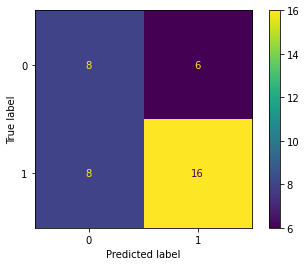

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.50      0.57      0.53        14
           1       0.73      0.67      0.70        24

    accuracy                           0.63        38
   macro avg       0.61      0.62      0.61        38
weighted avg       0.64      0.63      0.64        38

matthews_corrcoef:  0.2326210525996177
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.50 
The Kappa of your model is: 0.00
[[ 7  7]
 [12 12]]


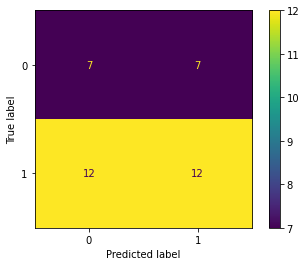

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.37      0.50      0.42        14
           1       0.63      0.50      0.56        24

    accuracy                           0.50        38
   macro avg       0.50      0.50      0.49        38
weighted avg       0.53      0.50      0.51        38

matthews_corrcoef:  0.0
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.66 
The Kappa of your model is: 0.37
[[13  1]
 [12 12]]


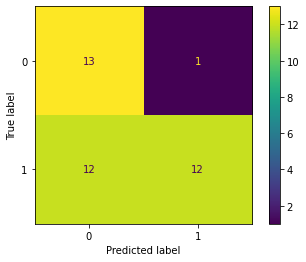

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.52      0.93      0.67        14
           1       0.92      0.50      0.65        24

    accuracy                           0.66        38
   macro avg       0.72      0.71      0.66        38
weighted avg       0.77      0.66      0.66        38

matthews_corrcoef:  0.43576382352153775


In [16]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(x,y,"tomek applied","under sample","StandardScaler",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.68 
The Kappa of your model is: 0.38
<function cohen_kappa_score at 0x00000130CDBF71F0>
[[11  3]
 [ 9 15]]


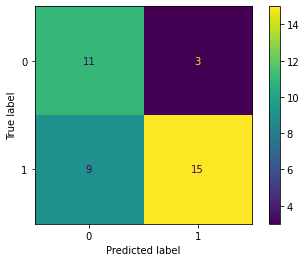

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.55      0.79      0.65        14
           1       0.83      0.62      0.71        24

    accuracy                           0.68        38
   macro avg       0.69      0.71      0.68        38
weighted avg       0.73      0.68      0.69        38

matthews_corrcoef:  0.3967876966218537
| KNN Model Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler , KNN N 2
The accuracy of the model on test set is: 0.53 
The Kappa of your model is: 0.09
[[ 9  5]
 [13 11]]


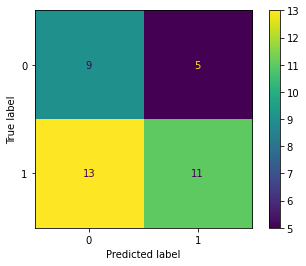

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.41      0.64      0.50        14
           1       0.69      0.46      0.55        24

    accuracy                           0.53        38
   macro avg       0.55      0.55      0.53        38
weighted avg       0.58      0.53      0.53        38

matthews_corrcoef:  0.09886394735483753
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.53 
The Kappa of your model is: 0.01
[[ 6  8]
 [10 14]]


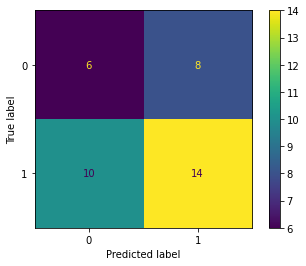

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.38      0.43      0.40        14
           1       0.64      0.58      0.61        24

    accuracy                           0.53        38
   macro avg       0.51      0.51      0.50        38
weighted avg       0.54      0.53      0.53        38

matthews_corrcoef:  0.011631052629980886
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.55 
The Kappa of your model is: 0.11
[[ 8  6]
 [11 13]]


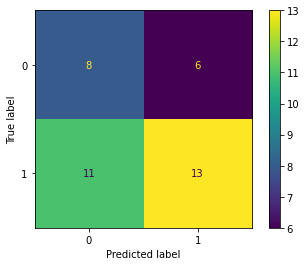

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.42      0.57      0.48        14
           1       0.68      0.54      0.60        24

    accuracy                           0.55        38
   macro avg       0.55      0.56      0.54        38
weighted avg       0.59      0.55      0.56        38

matthews_corrcoef:  0.1091089451179962
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , over sample , - Scaler:  StandardScaler
The accuracy of the model on test set is: 0.61 
The Kappa of your model is: 0.29
[[13  1]
 [14 10]]


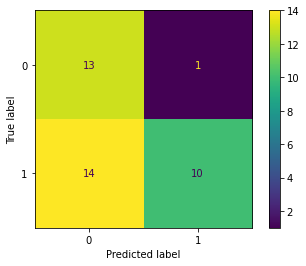

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.48      0.93      0.63        14
           1       0.91      0.42      0.57        24

    accuracy                           0.61        38
   macro avg       0.70      0.67      0.60        38
weighted avg       0.75      0.61      0.59        38

matthews_corrcoef:  0.3672063019255001


In [17]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(x,y,"tomek applied","over sample","StandardScaler",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.63 
The Kappa of your model is: 0.25
<function cohen_kappa_score at 0x00000130CDBF71F0>
[[ 9  5]
 [ 9 15]]


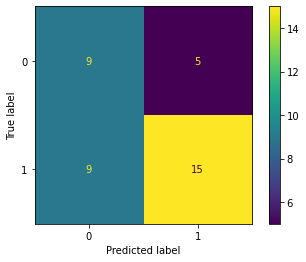

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        14
           1       0.75      0.62      0.68        24

    accuracy                           0.63        38
   macro avg       0.62      0.63      0.62        38
weighted avg       0.66      0.63      0.64        38

matthews_corrcoef:  0.25877458475338283
| KNN Model Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power , KNN N 2
The accuracy of the model on test set is: 0.53 
The Kappa of your model is: 0.14
[[11  3]
 [15  9]]


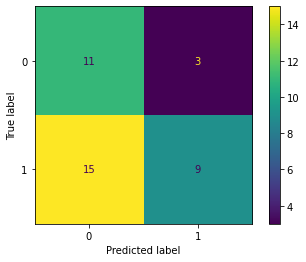

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.42      0.79      0.55        14
           1       0.75      0.38      0.50        24

    accuracy                           0.53        38
   macro avg       0.59      0.58      0.53        38
weighted avg       0.63      0.53      0.52        38

matthews_corrcoef:  0.1667810962487478
| Random Forest Classifier Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.55 
The Kappa of your model is: 0.11
[[ 8  6]
 [11 13]]


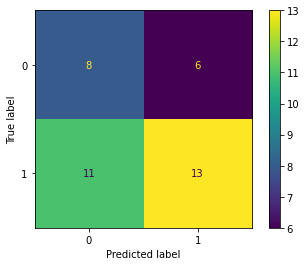

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.42      0.57      0.48        14
           1       0.68      0.54      0.60        24

    accuracy                           0.55        38
   macro avg       0.55      0.56      0.54        38
weighted avg       0.59      0.55      0.56        38

matthews_corrcoef:  0.1091089451179962
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.55 
The Kappa of your model is: 0.11
[[ 8  6]
 [11 13]]


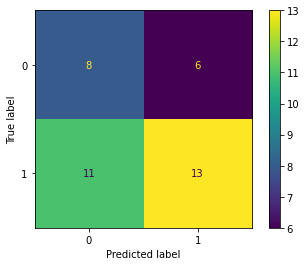

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.42      0.57      0.48        14
           1       0.68      0.54      0.60        24

    accuracy                           0.55        38
   macro avg       0.55      0.56      0.54        38
weighted avg       0.59      0.55      0.56        38

matthews_corrcoef:  0.1091089451179962
| Support Vector Machines Results
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.74 
The Kappa of your model is: 0.49
[[13  1]
 [ 9 15]]


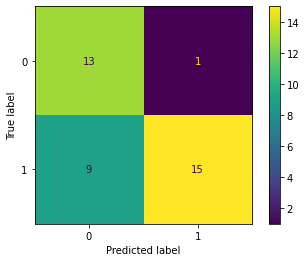

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.59      0.93      0.72        14
           1       0.94      0.62      0.75        24

    accuracy                           0.74        38
   macro avg       0.76      0.78      0.74        38
weighted avg       0.81      0.74      0.74        38

matthews_corrcoef:  0.5408439472941112


In [18]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(x,y,"tomek not applied","smote sample","power",2)

### Our best results are on the | Support Vector Machines 
With:: - Sample balancing:  tomek not applied , smote sample , - Scaler:  power
The accuracy of the model on test set is: 0.74 
The Kappa of your model is: 0.49
[[13  1]
 [ 9 15]]
 
 ------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.59      0.93      0.72        14
           1       0.94      0.62      0.75        24

    accuracy                           0.74        38
   macro avg       0.76      0.78      0.74        38
weighted avg       0.81      0.74      0.74        38

It predicts very well on the Happy customers for the recall. The Kappa could be higher though. But we see that in the recall most of the imprecision lies on the not happy customer. Which means that predictions are actually good. 

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.68 
The Kappa of your model is: 0.38
<function cohen_kappa_score at 0x00000130CDBF71F0>
[[11  3]
 [ 9 15]]


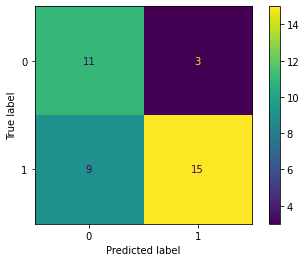

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.55      0.79      0.65        14
           1       0.83      0.62      0.71        24

    accuracy                           0.68        38
   macro avg       0.69      0.71      0.68        38
weighted avg       0.73      0.68      0.69        38

matthews_corrcoef:  0.3967876966218537
| KNN Model Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  MinMax , KNN N 2
The accuracy of the model on test set is: 0.58 
The Kappa of your model is: 0.25
[[13  1]
 [15  9]]


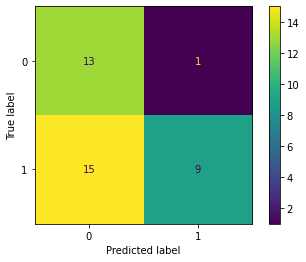

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.46      0.93      0.62        14
           1       0.90      0.38      0.53        24

    accuracy                           0.58        38
   macro avg       0.68      0.65      0.57        38
weighted avg       0.74      0.58      0.56        38

matthews_corrcoef:  0.3325458384852794
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.58 
The Kappa of your model is: 0.17
[[ 9  5]
 [11 13]]


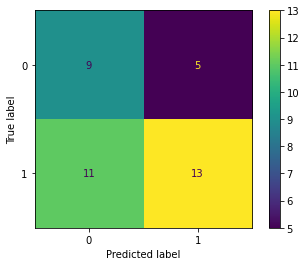

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.45      0.64      0.53        14
           1       0.72      0.54      0.62        24

    accuracy                           0.58        38
   macro avg       0.59      0.59      0.57        38
weighted avg       0.62      0.58      0.59        38

matthews_corrcoef:  0.17826693616344153
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.55 
The Kappa of your model is: 0.11
[[ 8  6]
 [11 13]]


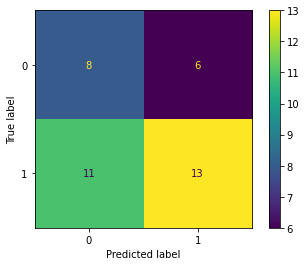

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.42      0.57      0.48        14
           1       0.68      0.54      0.60        24

    accuracy                           0.55        38
   macro avg       0.55      0.56      0.54        38
weighted avg       0.59      0.55      0.56        38

matthews_corrcoef:  0.1091089451179962
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.55 
The Kappa of your model is: 0.13
[[ 9  5]
 [12 12]]


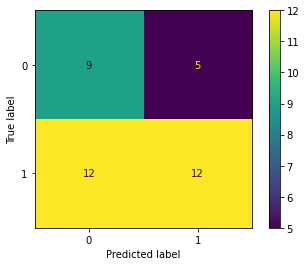

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.43      0.64      0.51        14
           1       0.71      0.50      0.59        24

    accuracy                           0.55        38
   macro avg       0.57      0.57      0.55        38
weighted avg       0.60      0.55      0.56        38

matthews_corrcoef:  0.1385917857350474


In [19]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(x,y,"tomek applied","under sample","MinMax",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek not applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.71 
The Kappa of your model is: 0.42
<function cohen_kappa_score at 0x00000130CDBF71F0>
[[11  3]
 [ 8 16]]


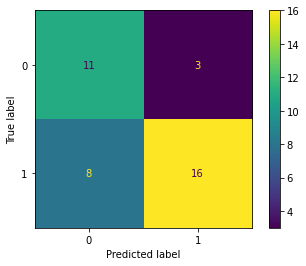

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.58      0.79      0.67        14
           1       0.84      0.67      0.74        24

    accuracy                           0.71        38
   macro avg       0.71      0.73      0.71        38
weighted avg       0.75      0.71      0.72        38

matthews_corrcoef:  0.4364357804719848
| KNN Model Results
With:: - Sample balancing:  tomek not applied , under sample , - Scaler:  MinMax , KNN N 2
The accuracy of the model on test set is: 0.61 
The Kappa of your model is: 0.29
[[13  1]
 [14 10]]


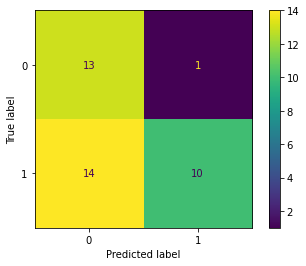

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.48      0.93      0.63        14
           1       0.91      0.42      0.57        24

    accuracy                           0.61        38
   macro avg       0.70      0.67      0.60        38
weighted avg       0.75      0.61      0.59        38

matthews_corrcoef:  0.3672063019255001
| Random Forest Classifier Results
With:: - Sample balancing:  tomek not applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.53 
The Kappa of your model is: 0.01
[[ 6  8]
 [10 14]]


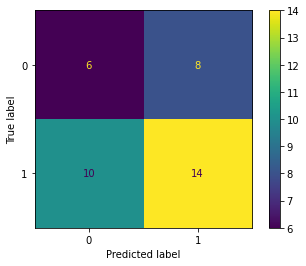

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.38      0.43      0.40        14
           1       0.64      0.58      0.61        24

    accuracy                           0.53        38
   macro avg       0.51      0.51      0.50        38
weighted avg       0.54      0.53      0.53        38

matthews_corrcoef:  0.011631052629980886
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek not applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.55 
The Kappa of your model is: 0.13
[[ 9  5]
 [12 12]]


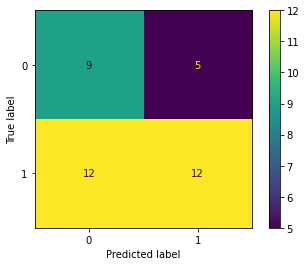

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.43      0.64      0.51        14
           1       0.71      0.50      0.59        24

    accuracy                           0.55        38
   macro avg       0.57      0.57      0.55        38
weighted avg       0.60      0.55      0.56        38

matthews_corrcoef:  0.1385917857350474
| Support Vector Machines Results
With:: - Sample balancing:  tomek not applied , under sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.58 
The Kappa of your model is: 0.21
[[11  3]
 [13 11]]


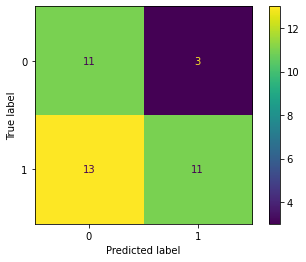

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.46      0.79      0.58        14
           1       0.79      0.46      0.58        24

    accuracy                           0.58        38
   macro avg       0.62      0.62      0.58        38
weighted avg       0.67      0.58      0.58        38

matthews_corrcoef:  0.24404761904761904


In [20]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(x,y,"tomek not applied","under sample","MinMax",2)

| Logistic Regression Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.68 
The Kappa of your model is: 0.38
<function cohen_kappa_score at 0x00000130CDBF71F0>
[[11  3]
 [ 9 15]]


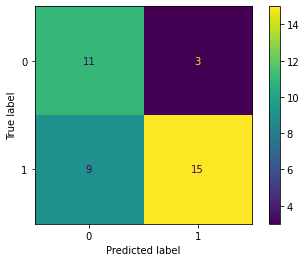

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.55      0.79      0.65        14
           1       0.83      0.62      0.71        24

    accuracy                           0.68        38
   macro avg       0.69      0.71      0.68        38
weighted avg       0.73      0.68      0.69        38

matthews_corrcoef:  0.3967876966218537
| KNN Model Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  MinMax , KNN N 2
The accuracy of the model on test set is: 0.53 
The Kappa of your model is: 0.11
[[10  4]
 [14 10]]


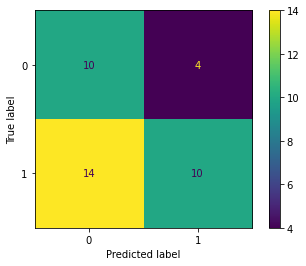

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.42      0.71      0.53        14
           1       0.71      0.42      0.53        24

    accuracy                           0.53        38
   macro avg       0.57      0.57      0.53        38
weighted avg       0.60      0.53      0.53        38

matthews_corrcoef:  0.13095238095238096
| Random Forest Classifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.63 
The Kappa of your model is: 0.27
[[10  4]
 [10 14]]


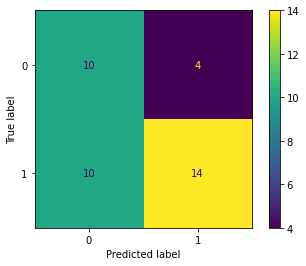

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.50      0.71      0.59        14
           1       0.78      0.58      0.67        24

    accuracy                           0.63        38
   macro avg       0.64      0.65      0.63        38
weighted avg       0.68      0.63      0.64        38

matthews_corrcoef:  0.2875273163926476
| AdaBoostClassifier Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.50 
The Kappa of your model is: 0.05
[[ 9  5]
 [14 10]]


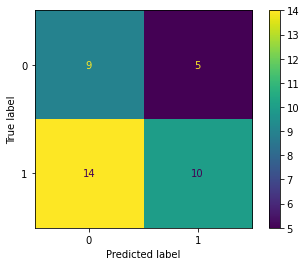

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.39      0.64      0.49        14
           1       0.67      0.42      0.51        24

    accuracy                           0.50        38
   macro avg       0.53      0.53      0.50        38
weighted avg       0.57      0.50      0.50        38

matthews_corrcoef:  0.05874228140418678
| Support Vector Machines Results
With:: - Sample balancing:  tomek applied , smote sample , - Scaler:  MinMax
The accuracy of the model on test set is: 0.63 
The Kappa of your model is: 0.29
[[11  3]
 [11 13]]


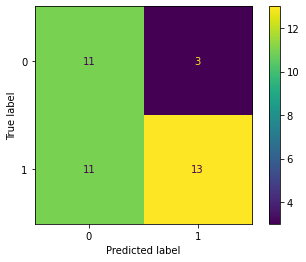

------ Classification_Report------ 
              precision    recall  f1-score   support

           0       0.50      0.79      0.61        14
           1       0.81      0.54      0.65        24

    accuracy                           0.63        38
   macro avg       0.66      0.66      0.63        38
weighted avg       0.70      0.63      0.64        38

matthews_corrcoef:  0.31985394732447436


In [21]:
X_train_scaled_bal, y_train_scaled_bal = classification_model(x,y,"tomek applied","smote sample","MinMax",2)